In [1]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import config
config.update("jax_enable_x64", True)
import matplotlib.pyplot as plt
import jaxopt
import scipy

In [2]:
def expand(H0,M):
    D,chi = H0.shape[0:2]
    H = jnp.reshape(jnp.einsum('ijkl,kpmn->ijpmln',H0,M),(D,chi*D,D,chi*D))
    return H

def construct_H(M,L):
    H = M
    for i in range(L-1):
        H = expand(H,M)
    H = jnp.einsum("ijil->jl",H)
    H = H
    return H

def mat_from_Lbeta(L,beta):
    M = np.zeros((2,2,2,                                                                                             2),dtype=jnp.complex128)
    M[0,0,1,0] = 1.0
    M[0,0,0,1] = 1.0
    M[0,0,1,1] = 1.0
    M[1,1,0,0] = 1.0
    M[1,1,0,1] = 1.0
    M[1,1,1,0] = 1.0
    M = jnp.array(M)

    delta = np.zeros((2,2,2,2))
    delta[0,0,0,0] =1.0
    delta[1,1,1,1] =1.0
    temp = np.array([[np.exp(beta),np.exp(-beta)],[np.exp(-beta),np.exp(beta)]])
    tempI= np.array([[np.exp(-beta),np.exp(+beta)],[np.exp(beta),np.exp(-beta)]])
    V,VI = jnp.array(np.einsum("ijkl,ka->ijal",delta,temp)),jnp.array(np.einsum("ijkl,ka->ijal",delta,tempI))

    return construct_H(V,L)@construct_H(M,L)@construct_H(VI,L)


In [3]:
T = mat_from_Lbeta(6,0.0)

2023-06-10 18:15:28.018331: E external/org_tensorflow/tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [4]:
def specrad(V):
    return np.max(np.abs(np.linalg.eigvals(np.array(V))))

In [5]:
def Ak(T,maxk):
    rad = specrad(T)
    res = np.zeros(maxk)
    Tr = T/rad
    T0 = Tr

    for k in range(1,maxk+1):
        # res[k-1]= jnp.linalg.norm(T0,ord=2)
        # T0 = T0@Tr
        res[k-1]= jnp.linalg.norm(jnp.linalg.matrix_power(T0,k),ord=2)
    return res

In [6]:
x =Ak(mat_from_Lbeta(12,0.0),100)
sum(x/np.max(x)<0.99)

11

In [7]:
x = np.array([ 4.9568426 , 11.66003016, 17.97281116, 22.684749  , 25.90245136,
       28.02649836, 29.4114495 , 30.31133522, 30.89619513, 31.27703074,
       31.525656  , 31.68842863, 31.79529823, 31.86565737, 31.91209932,
       31.94282775, 31.96320392, 31.97674235, 31.98575374, 31.9917615 ,
       31.99577252, 31.99845384, 32.0002483 , 32.00145043, 32.00225645,
       32.00279731, 32.00316047, 32.00340447, 32.0035685 , 32.00367881,
       32.00375302, 32.00380297, 32.0038366 , 32.00385924, 32.00387449,
       32.00388477, 32.00389169, 32.00389636, 32.0038995 , 32.00390162,
       32.00390305, 32.00390402, 32.00390467, 32.0039051 , 32.0039054 ,
       32.0039056 , 32.00390573, 32.00390582, 32.00390588, 32.00390593,
       32.00390595, 32.00390597, 32.00390599, 32.00390599, 32.003906  ,
       32.003906  , 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601,
       32.00390601, 32.00390601, 32.00390601, 32.00390601, 32.00390601])

In [569]:
y = np.array([  6.80277905,  19.45442366,  33.88202871,  46.7854084 ,
        57.57665768,  66.56553193,  74.15542474,  80.65925284,
        86.29595261,  91.21852835,  95.53807261,  99.33938413,
       102.69026759, 105.6469313 , 108.25714989, 110.56218624,
       112.59802915, 114.39624842, 115.98462882, 117.38766901,
       118.62699187, 119.72169224, 120.68863695, 121.54272654,
       122.2971251 , 122.96346262, 123.55201363, 124.07185492,
       124.53100501, 124.93654728, 125.29473895, 125.61110727,
       125.89053458, 126.13733355, 126.35531352, 126.54783924,
       126.71788273, 126.86806905, 127.00071686, 127.1178741 ,
       127.22134962, 127.31274108, 127.3934596 , 127.46475154,
       127.5277177 , 127.58333038, 127.63244832, 127.67582998,
       127.71414527, 127.74798584, 127.77787429, 127.80427215,
       127.82758707, 127.84817911, 127.86636624, 127.88242934,
       127.89661646, 127.90914669, 127.92021354, 127.9299879 ,
       127.93862074, 127.94624535, 127.9529795 , 127.95892718,
       127.96418023, 127.96881979, 127.97291749, 127.97653663,
       127.9797331 , 127.98255625, 127.98504969, 127.98725193,
       127.98919696, 127.99091484, 127.99243209, 127.99377214,
       127.99495569, 127.99600101, 127.99692425, 127.99773966,
       127.99845985, 127.99909592, 127.99965771, 128.00015388,
       128.00059211, 128.00097916, 128.00132101, 128.00162293,
       128.00188959, 128.00212511, 128.00233312, 128.00251684,
       128.0026791 , 128.00282241, 128.00294898, 128.00306077,
       128.00315951, 128.00324671, 128.00332373, 128.00339176])
sum(y/np.max(y)<0.99)

37

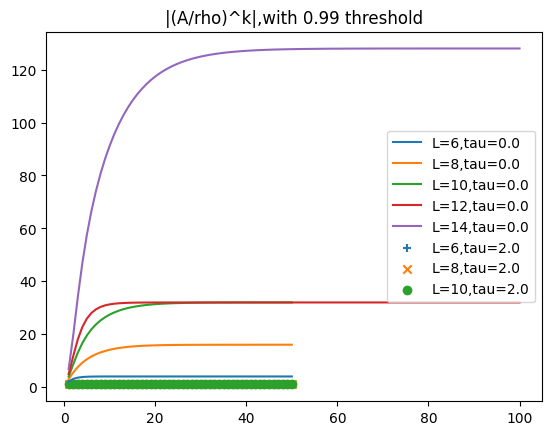

<Figure size 640x480 with 0 Axes>

In [570]:
plt.title("|(A/rho)^k|,with 0.99 threshold")

plt.plot(np.arange(1,51),Ak(mat_from_Lbeta(6,0.0),50),label="L=6,tau=0.0")
plt.plot(np.arange(1,51),Ak(mat_from_Lbeta(8,0.0),50),label="L=8,tau=0.0")
plt.plot(np.arange(1,51),Ak(mat_from_Lbeta(10,0.0),50),label="L=10,tau=0.0")
plt.plot(np.arange(1,101),x,label="L=12,tau=0.0")
plt.plot(np.arange(1,101),y[0:100],label="L=14,tau=0.0")
plt.scatter(np.arange(1,51),Ak(mat_from_Lbeta(6,2.0),50),marker='+',label="L=6,tau=2.0")
plt.scatter(np.arange(1,51),Ak(mat_from_Lbeta(8,2.0),50),marker='x',label="L=8,tau=2.0")
plt.scatter(np.arange(1,51),Ak(mat_from_Lbeta(10,2.0),50),marker='o',label="L=10,tau=2.0")
plt.legend()
plt.show()
plt.savefig("tmp.png")

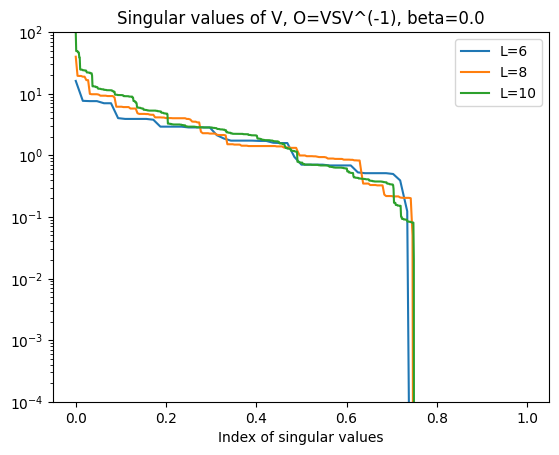

In [8]:
# for L in [6,8,10]:
#     T = mat_from_Lbeta(L,0.0)
#     U,S,V = np.linalg.svd(T)
#     plt.plot(np.arange(S.size)/S.size,S,label="L={}".format(L))
# plt.plot(np.arange(s6.size)/s6.size,s6,label="L=6")
# plt.plot(np.arange(s8.size)/s8.size,s8,label="L=8")
# plt.plot(np.arange(s10.size)/s10.size,s10,label="L=10")
# plt.plot(np.arange(s12.size)/s12.size,s12,label="L=12")
plt.legend()
plt.yscale("log")
plt.xlabel("Index of singular values")
plt.ylim(1e-4,100)
plt.title("Singular values of V, O=VSV^(-1), beta=0.0")
plt.show()
# plt.plot(s,label="Singular values of V, L=8, beta=6.0")

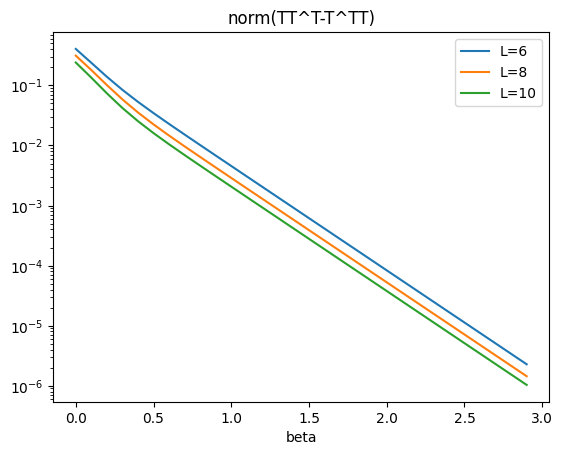

In [15]:
for L in [6,8,10]:
    data=[]
    betarange = np.arange(0.0,3.0,0.1)
    for beta in betarange:
        T = mat_from_Lbeta(L,beta)
        data.append(np.linalg.norm(T@T.T-T.T@T)/np.linalg.norm(T)**2)
    data = np.array(data)
    plt.plot(betarange,data,label="L={}".format(L))
#     plt.plot(np.arange(S.size)/S.size,S,label="L={}".format(L))
# plt.plot(np.arange(s6.size)/s6.size,s6,label="L=6")
# plt.plot(np.arange(s8.size)/s8.size,s8,label="L=8")
# plt.plot(np.arange(s10.size)/s10.size,s10,label="L=10")
# plt.plot(np.arange(s12.size)/s12.size,s12,label="L=12")
plt.legend()
plt.yscale("log")
plt.xlabel("beta")
# plt.ylim(1e-4,100)
plt.title("norm(TT^T-T^TT)")
plt.show()
# plt.plot(s,label="Singular values of V, L=8, beta=6.0")